In [77]:
import pandas as pd
import numpy as np
import datetime
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

In [78]:
df = pd.read_excel("original_data_complete.xlsx")

In [80]:
cols = ['video_2017','Number_of_Institutions_Holding_Shares','tweets','average_age','avg_favourite','liked','Shares_Held_by_All_Insider','num_sections','Float_Held_by_Institutions']
for a in cols:
    for b in df.index:
        if pd.isnull(df.loc[b,a]): 
            df.loc[b,f'{a}_group'] = 'missing'
        for i in range(0,5):
            if (df.loc[b,a] >= df[a].quantile(i/10*2)) & (df.loc[b,a] < df[a].quantile((i+1)/10*2)):
                df.loc[b,f'{a}_group'] = f'P{i*10*2}-P{(i+1)*10*2}'
            else:
                pass
        if df.loc[b,a] == df[a].quantile(1):
            df.loc[b,f'{a}_group'] = 'P80-P100'

In [35]:
df = df[pd.notnull(df['margin_change'])]
df.to_excel('data_group.xlsx')

E:\Python\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://www.facebook.com/TeckResourcesLtd/?__tn__=K-R&eid=ARCv8WxD9RVy_uAByKSteoBaQc00Z_d-yRM2Z6iG4keBnxjH8zhYRL5GfbY5ZJ0j1UiwcW9uZLAuLJiO&fref=mentions&__xts__%5B0%5D=68.ARAvq47EJIIsY22c0kFjpH40u0-ovbAYARV8wHTutHUbvQo3A3z5l5wXxry8Qaqgz-Zro89HCdN6MVjA3WcfaQ7cXOKiRdyKOMqnWqIKbUgT3CK-QBpagRjIvVf7KKtRhe4TRYaWXRnV4Oi7_TFDkw3aH98sLEKJtnnal8TfW1vWItNA_MIRVOTC5IKXg6JPw3NUN4p67bsj8UKP6x3jtf_EPbnU79AlbilHt9AW0jp6NUOs6NVXV0qwg4iNQJSwmZUHxbf5QhcgvaQWkDM30_5bcKWKEwOl7XaTgB_gFI3eOvYSg2uYHYiAYMksgngFeis-ZPHNnJ2CEgQAIkrsFAGD41DV' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
E:\Python\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://www.facebook.com/pages/Citius-Pharmaceuticals/125252154197427?fref=mentions&__xts__%5b0%5d=68.ARBPjr6qtvzVa4yYH5ljl6dsENZblpItaFZV_hvQMlgC8ZFH6SeSdXpSZbayhEG62P4EjD81inFCOXzCZEAyuD_3P-0ig7ehblP6S

In [81]:
writer = pd.ExcelWriter("grouped_5.xlsx",engine='openpyxl')
for a in cols:
    grouped = df.groupby([f'{a}_group', 'margin_change_90']).size().unstack()
    grouped = grouped.replace(np.nan, 0)
    grouped['sum'] = grouped[0.0] + grouped[1.0]
    grouped['event_rate'] = grouped[1.0]/grouped['sum']
    grouped = grouped[['event_rate']]
    grouped.to_excel(writer,f"{a}")
writer.save()
writer.close()

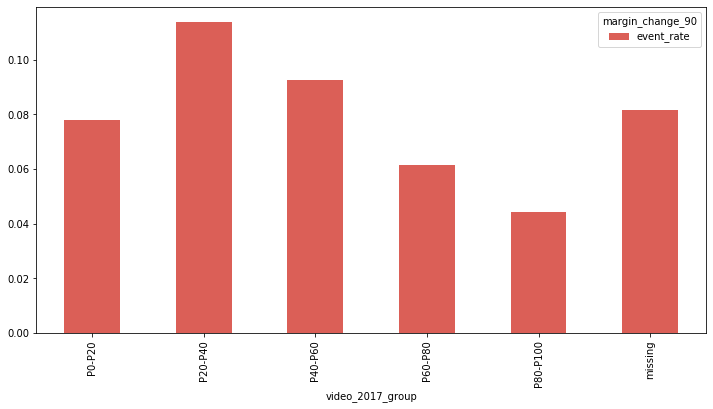

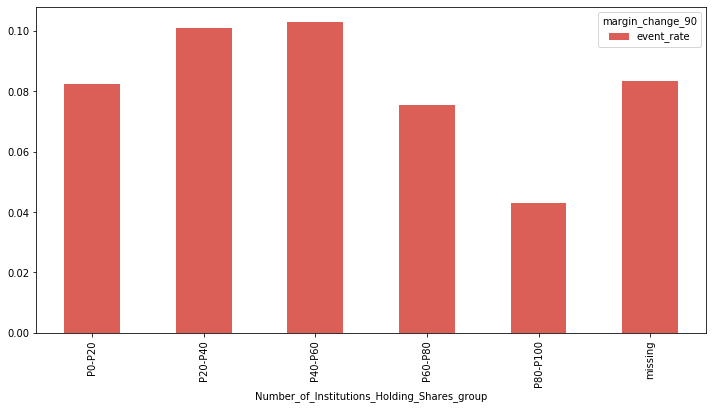

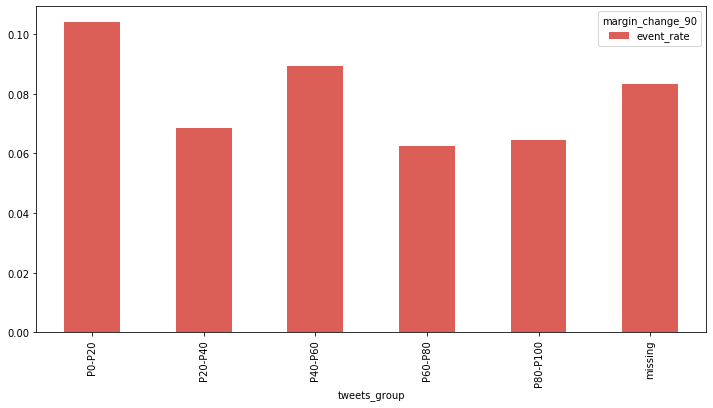

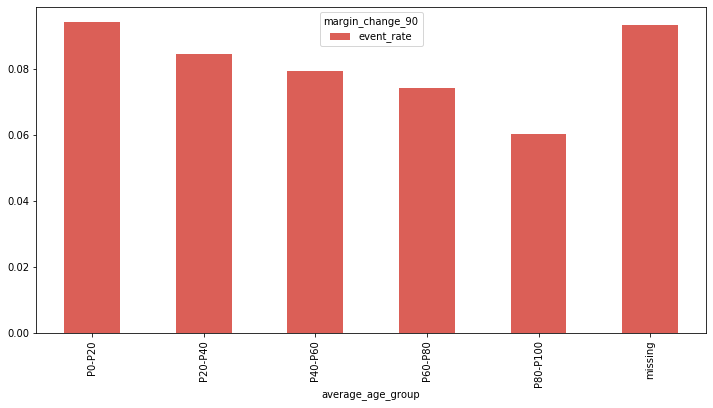

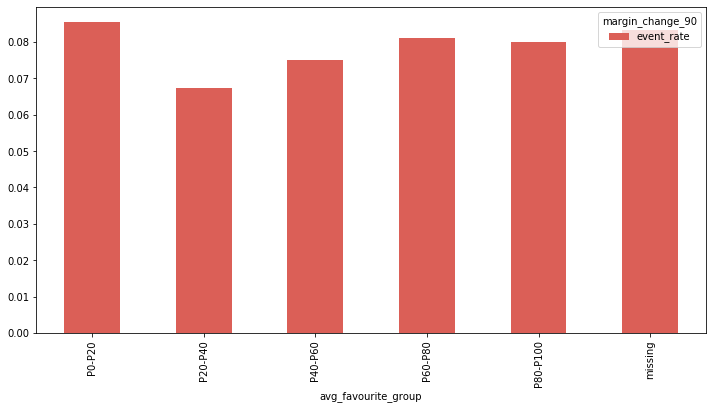

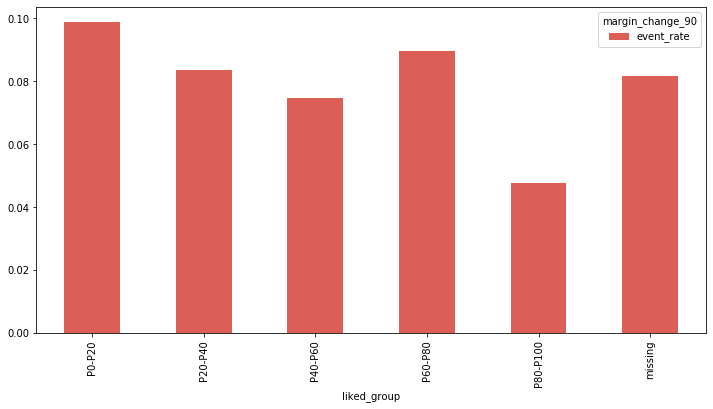

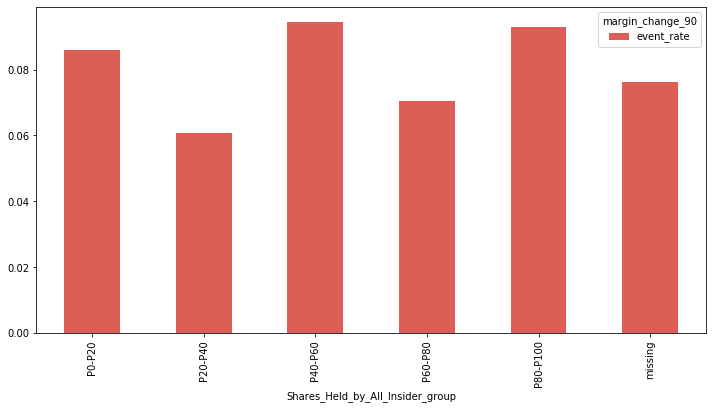

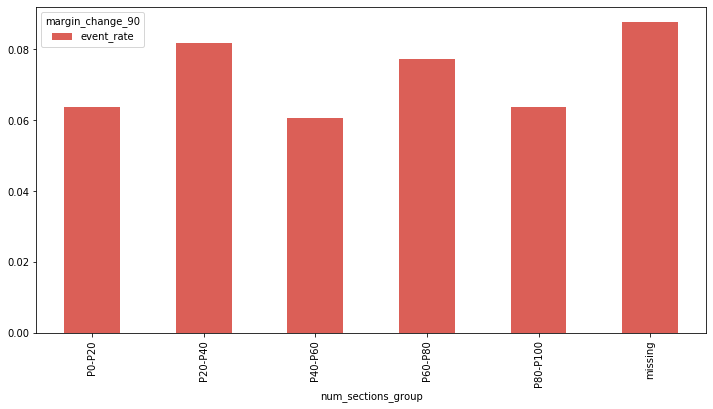

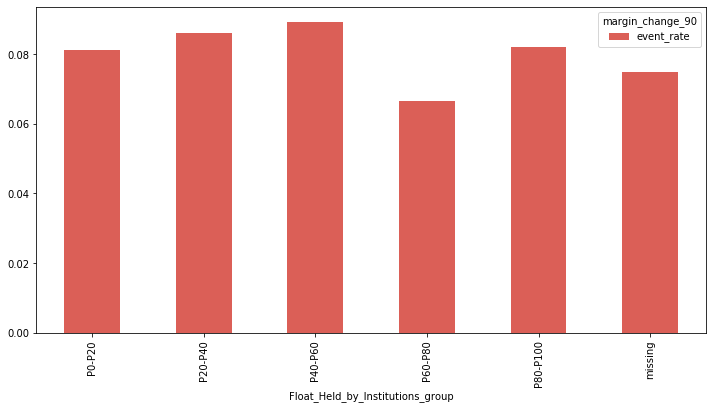

In [82]:
for a in cols:
    grouped = df.groupby([f'{a}_group', 'margin_change_90']).size().unstack()
    grouped = grouped.replace(np.nan, 0)
    grouped['sum'] = grouped[0.0] + grouped[1.0]
    grouped['event_rate'] = grouped[1.0]/grouped['sum']
    grouped = grouped[['event_rate']]
    grouped.plot(kind='bar',figsize=(12,6))
    #sns.distplot(grouped) 

In [72]:
sns.distplot(grouped,kde=True)

AttributeError: module 'seaborn' has no attribute 'displot'